###### Show popular word of "fashion" from https://www.vogue.com/
In both gender

In [1]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
user_agent = UserAgent()
bu_lst = []    # for each bu href
women_all = []    # for women article href
men_all = []    # for men article href
women_content = ''      # for women article content
men_content = ''     # for men article content

In [50]:
## get all bu url under fashion
def get_bu():
    url = 'https://www.vogue.com/fashion'
    response = requests.get(url, headers={ 'user-agent': user_agent.random })
    html_doc = response.text
    soup = BeautifulSoup(response.text, 'lxml')
    
    bu = soup.select('#main-content > div> nav > ul > li> a')
    for i in bu:
        bu_lst.append(i['href'])

## get all bu article & sort by gender 
def get_art_url():
    for i in bu_lst:
#         print(str(i)[8:])
        url = 'https://www.vogue.com/fashion' + str(i)[8:]
        response = requests.get(url, headers={ 'user-agent': user_agent.random })
        html_doc = response.text
        soup = BeautifulSoup(response.text, 'lxml')
        
        anchor = soup.select('div > div > div > div > div.summary-item__content > a')
        
        for k in anchor:
            if 'women' in k['href']: 
                if k['href'] not in women_all:        
                    women_all.append(k['href'])
            elif 'men' in k['href']: 
                if k['href'] not in men_all: 
                    men_all.append(k['href']) 
            else:
                if k['href'] not in women_all:        
                    women_all.append(k['href'])

## get all women article content
def get_women_art():
    global women_content
    for i in women_all:   # page with slide 
        
        url = 'https://www.vogue.com' + i
        response = requests.get(url, headers={ 'user-agent': user_agent.random })
        html_doc = response.text
        soup = BeautifulSoup(response.text, 'lxml')
        
        if soup.select('div > div.body.gallery__intro__body > div > p'):   # slide structure
            for k in soup.select('div > div.body.gallery__intro__body > div > p'):
                women_content += k.get_text() + '\n '
        else:
            for k in soup.select('div.article__chunks > div > div> p'): # article structure 
                women_content += k.get_text() + '\n ' 

## get all men article content
def get_men_art():
    global men_content
    for i in men_all:   
        
        url = 'https://www.vogue.com' + i
        response = requests.get(url, headers={ 'user-agent': user_agent.random })
        html_doc = response.text
        soup = BeautifulSoup(response.text, 'lxml')
        
        if soup.select('div > div.body.gallery__intro__body > div > p'):   # slide structure
            for k in soup.select('div > div.body.gallery__intro__body > div > p'):
                men_content += k.get_text() + '\n '
        else:
            for k in soup.select('div.article__chunks > div > div> p'): # article structure 
                men_content += k.get_text() + '\n ' 

## remove punc./stopwords & generate wordcloud
def to_cloud(articles):
    rmvlst = ['"','&','(',')',',','.','/',':',';','?','[',']','{','}','-','—','”','“',\
          ' a ',' an ',' and ',' are ',' are ',' at ',' be ',' by ',' have ',' in ',' is ',\
          ' it ',' of ',' on ',' only ',' or ',' says ',' since ',' that ',' the ',' this ',\
          ' to ',' was ',' who ',' with ',' you ',' your ',' yours ',' as ',' there ',' for ',\
          ' but ',' all ',' from ',' i ',' we ',' not ',' up ',' out ',' one ',' my ',' me ',\
          ' best ', ' about ',' no ',' more ',' has ',' been ',' while ',' off ',' those ',' so ',\
          ' than ',' over ',' this ',' they ',' their ',' them ', ' can ',' these ',' much ',\
          ' which ',' when ',' too ',' what ',' will ', ' into ', ' do ',' also ',' go ',' our ',\
          ' just ',' more ',' even ',' most ',' take ', ' some ',' after ',' like ', ' whether ',\
          ' might ',' may ',' if ',' its ',' make ',' were ',' come ',' less ',' above ',' own ',\
          ' below ',' how ',' had ',' made ',' would ',' still ',' where ',' going ',' get ',\
          ' many ',' around ',' before ',' after ',' us ',' other '\
             ]
    indlst = [' style ', ' trend ', ' look ', ' looks ', ' now ', ' time ',' wear ',\
              ' season ', ' fashion ',' pieces ',' favorite ', ' latest ',' it’s ',' through ',\
              ' don’t' ,' we’re ',' menswear ',' his ',' men ',' men’s ',' she ',' her ',' i’m ',\
              ' he ',' really ',' because ',' way ',' want ',' very ',' well ',' always ',\
              ' think ',' you’re ',' something ',' things ',' week ',' year ',' day ',' that’s ',\
              ' person ',' people '
             ]
    tmp = articles.lower()
    for i in (rmvlst + indlst):
        tmp = ''.join(tmp).replace(i,' ')
    
    wordfreq = Counter(tmp.split())
    cloud= WordCloud(width=800, height=400, max_words=20).generate_from_frequencies(wordfreq)
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()
#     cloud.to_file('wordcloud.png')

In [30]:
# get_bu()
# get_art_url()
# get_women_art()
get_men_art()

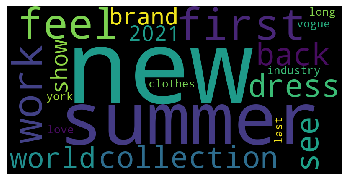

In [51]:
to_cloud(women_content)

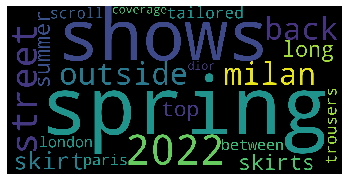

In [47]:
to_cloud(men_content)

In [27]:
print('All article: '+ str(len(women_all) + len(men_all)))
print('Total word: '+ str(len(women_content.split()) + len(men_content.split())))
print('----------')
print('Women article: '+ str(len(women_all)))
print('Total word: '+ str(len(women_content.split())))
print('----------')
print('Men article: '+ str(len(men_all)))
print('Total word: '+ str(len(men_content.split())))

All article: 181
Total word: 90211
----------
Women article: 172
Total word: 88720
----------
Men article: 9
Total word: 1491
